# BIG DATA ANALYTICS COURSE

## Quiz 5 Exploratory Data Analysis and Visualization

In this challenge quiz, you will be performing exploratory data analysis on the 'iris' dataset. You can find information about the dataset here: https://archive.ics.uci.edu/ml/datasets/iris.

Review the Data Set Description at this site to gain familiarity with the basics of the data. The quiz will afford you the opportunity to explore quite a bit more.

Import the data using the following commands in your Jupyter notebook:


In [134]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# get data
iris = load_iris()

# get feature values
iris_data = iris['data']

# get target values
iris_target = iris['target']

# get feature names
iris_names = iris['feature_names']

# get target names
iris_target_names = iris['target_names']

# create a DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])


In [128]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [120]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 1. We'd like a tool to orient ourselves with respect to a new dataset. Write a function in Python called 'quick_analysis'.  Assume the input is a pandas DataFrame, and that the function prints the following values to the console:

- Data Types
- Number of rows and columns
- Index Range
- Column Names
- Number of Null Values
- Mean Value
- Std Deviation
- Absolute Average Deviation (AAD)

Also assume the dataset is presented as rows of observations, with each column representing a feature.  Apply this function to the 'iris' dataset.  What is the AAD of the 'petal width' feature (in cm)?

In [68]:
def quick_analysis (df):
    print('\033[1m' + 'Data types of the dataset: ' + '\033[0m')
    df.info()
    print('\n')
    print('\033[1m' + 'Number of Rows: ' + '\033[0m' + str(df.shape[0]) + '\n')
    print('\033[1m' + 'Number of Columns: ' + '\033[0m' + str(df.shape[1]) + '\n')
    print('\033[1m' + 'Index Range: ' + '\033[0m' + str(len(df.index)) + '\n')
    print('\033[1m' + 'Column names: ' + '\033[0m', end="")
    for name in df.columns:
        print(name +', ', end="")
    #number of null values
    nv = df.isnull().sum().sum()
    print('\n')
    print('\033[1m' + 'Number of null values: ' + '\033[0m' + str(nv) + '\n')
    print('\033[1m' + 'Mean values: ' + '\033[0m' + str(np.mean(df)) + '\n')
    print('\033[1m' + 'Standard deviations: ' + '\033[0m' + str(np.std(df)) + '\n')
    print('\033[1m' + 'Absolute Average Deviation (AAD): ' + '\033[0m' + str(df.mad()) + '\n')

quick_analysis (iris_df)

Data types of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Number of Rows: 150

Number of Columns: 5

Index Range: 150

Column names: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target, 

Number of null values: 0

Mean values: sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

Standard deviations: sepal length (cm)    0.825301
sepal width (cm)     0.434411
petal length (cm)    1.759404
petal width (cm

In [69]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 2. Using matplotlib, render a box and whisker plot of the 'iris' data. Prepare this plot with a descriptive title, and x-axis and y-axis labels. Which feature has the most outliers?

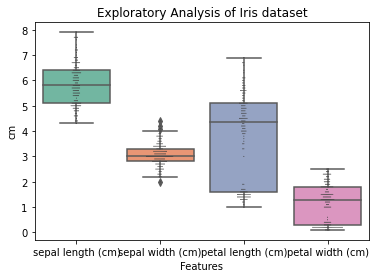

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# create a box plot of attributes for all species in the dataset
#iris_df.plot(kind='box') 
#plt.show()

# create a box plot of attributes for all species in the dataset using seaborn
# extract columns 0 throug 3
cols = [0,1,2,3]
iris_df2 = iris_df[iris_df.columns[cols]]

#create the boxplot
ax = sns.boxplot(data=iris_df2, palette="Set2")
ax.set(title='Exploratory Analysis of Iris dataset')
ax.set(xlabel='Features')
ax.set(ylabel='cm')

# add datapints on top of the boxplot
ax = sns.swarmplot(data=iris_df2, color=".25", size=1.0)

'sepal width' feature has the most outliers

### 3. Using pandas histogram functionality, render a histogram plot of each feature in the 'iris' data. Use default labeling and nbins = 20. From a visual inspection of the plots, which two feature seem closest to unimodal normal distributions?

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

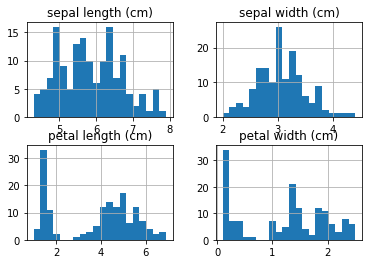

In [95]:
iris_df2.hist(bins=20)

By visual inspection, 'sepal length' and 'sepal width' seem closer to unimodal normal distributions

### 4. Another useful library for rendering visualizations is the Seaborn library. Use this capability to render a pairplot of the 'iris' data. From a visual inspection of the plots, which feature appears the least predicitive of class ('target')? Save this plot (plt.savefig('filename.png')) as you'll refer back to it in the next question.

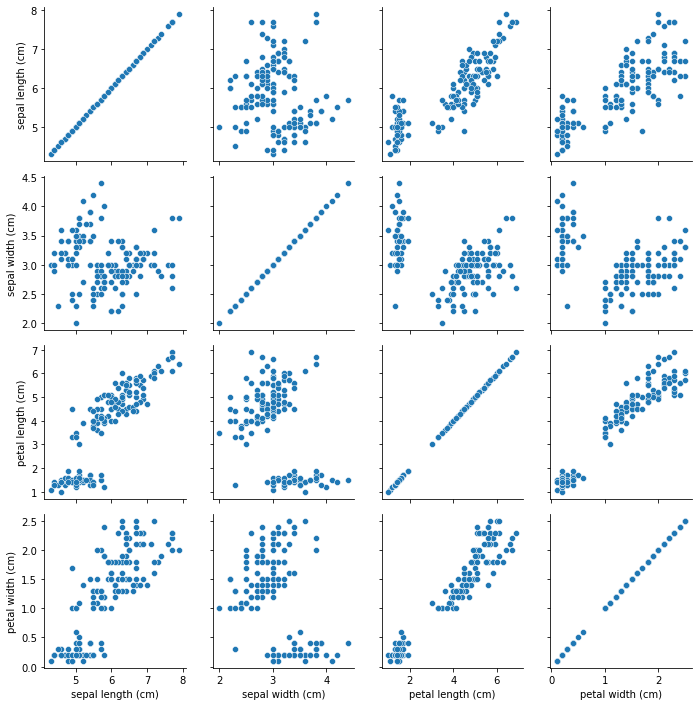

In [96]:
ax = sns.PairGrid(iris_df2)
ax.map(sns.scatterplot)

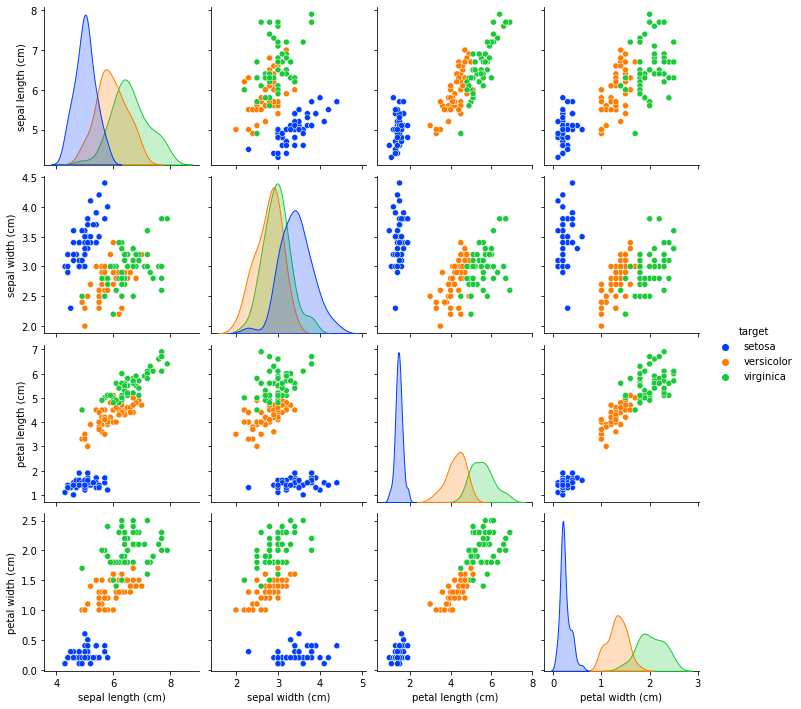

In [135]:
#recoding target into species names: 0= setosa; 1=versicolor; 2=virginica
iris_df['target'].replace(0.0,'setosa', inplace =True)
iris_df['target'].replace(1.0,'versicolor', inplace =True)
iris_df['target'].replace(2.0,'virginica', inplace =True)
ax = sns.pairplot(iris_df, hue='target', palette="bright")

In [130]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [110]:
ax.savefig('iris_pairplot.png')

### 5. Refer back to the pairplot of the 'iris' data. If you were going to design a 'setosa' detector, which two features would you consider first for your detector?

**Petal length** clearly differenciates **setosa**--for which all values are smaller than 2.0--from the other two classes.

**Petal width** also stand as an attribute we can use to make a linear distiction between **setosa** and **versicolor + virginica**

### 6. Another informative plot is a plot of the correlation matrix derived from a dataset. Using pandas, compute the correlation matrix for the 'iris' dataset and use the Seaborn heatmap functionality to plot a correlation matrix plot. Which two features are the most uncorrelated?

In [136]:
# calculate the correlation matrix
corrMatrix = iris_df.corr()

print(corrMatrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


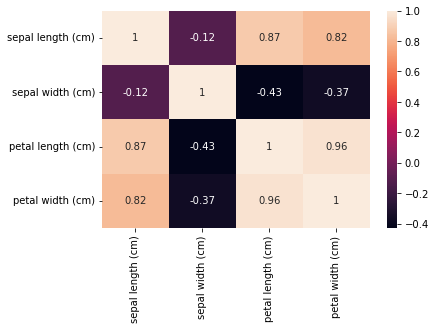

In [140]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

**sepal width** and **sepal length** with a negative correlation coefficient of -0.12 are the two less-correlated features. They would be followed by **sepal width** and **petal width** with a negative correlation coef of -0.37

### 7. Confirm your answer to the previous question by rendering a scatter plot of the two features that you identified. From this plot, the two features can best be described as resembling?

Text(0.5, 1.0, 'Petal length vs Sepan length')

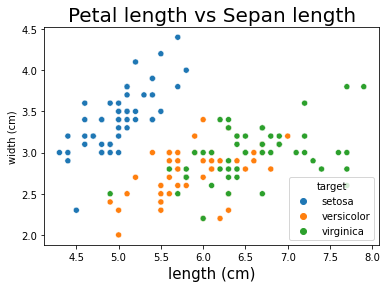

In [159]:
# create the scaterplot
ax = sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['target'])
ax.set_ylabel('width (cm)')
ax.set_xlabel('length (cm)',  fontsize=15)
ax.set_title('Petal length vs Sepan length', fontsize=20)

### 8. Use matplotlib to plot (plt.scatter) the petal length (cm) vs. target, where target is a member of the set {0, 1, 2}. From this scatter plot, which of the following is true?

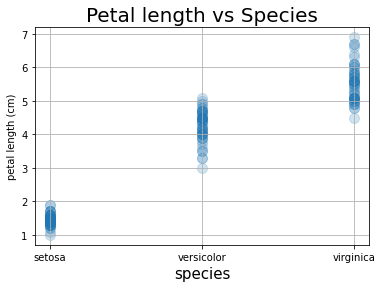

In [158]:
fig, ax = plt.subplots()
ax.scatter(iris_df['target'], iris_df['petal length (cm)'], s=100, alpha=0.2)
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('species',  fontsize=15)
ax.set_title('Petal length vs Species', fontsize=20)
ax.grid(True)

plt.show()

 - A. Petal lengths less than 1.5 are of class Setosa
 - B. Petal lengths greater than 2.0 are of class Virginica
 - C. Petal lengths are equally distributed among classes
 - D. There are 27 specimens observed in this dataset
 - E. Petal lengths less than 0.5 are of class Virginica
 
 Statement A is true. B is not true: Eventhough all virginica have petal lengths greater than 2.0, the opposite is not quite true since versicolor may also have petal lengths greater than 2.0

### 9. Regarding data summarization, which of the following is not a 'measure of location' of a set of points.
 - A. mean
 - B. median
 - C. trimmed mean
 - D. variance

Variance is not a measure of location but spreadness

### 10. A histogram plot can be thought of as an estimate of a variable's probability distribution.
- True
- False


The statement is true. A histogram can be used to estimate the probability distribution